In [9]:
import numpy as np
import matplotlib.pyplot as plt
from path_processors import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# tap, taps, walk, walks, talk, talks, mem, mems, pdq8, demog, updrs = restoreSynapseTables()

# i = 0
# for walk in walks:
#     if "deviceMotion" in walks[walk]:# and "rest" in walks[walk]:
#         #print(walks[walk])
#         i += 1
#         if i>20:
#             break

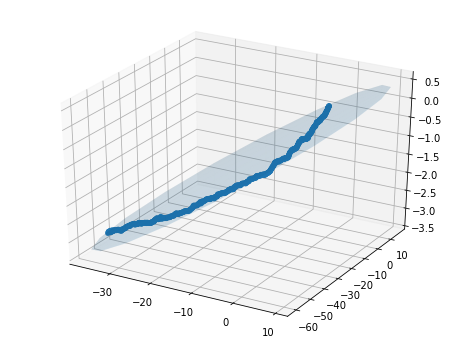

AttributeError: 'list' object has no attribute 'shape'

In [2]:
from path_processors import *

def visualizePath(file, x0=-3, x1=3, y0=-3, y1=3):
    X, wavelength, errors  = loadMotionIntoArray(file)
    xyz = accelerationToPos(X)
    
#     # point it and some other stuff
#     U, D, V = la.svd(A)    

#     rx, ry, rz = [1/np.sqrt(d) for d in D]
#     u, v = np.mgrid[0:2*np.pi:20j,-np.pi/2:np.pi/2:10j]    

#     x=rx*np.cos(u)*np.cos(v)
#     y=ry*np.sin(u)*np.cos(v)
#     z=rz*np.sin(v)

#     for idx in range(x.shape[0]):
#         for idy in range(y.shape[1]):
#             x[idx,idy],y[idx,idy],z[idx,idy] = np.dot(np.transpose(V),np.array([x[idx,idy],y[idx,idy],z[idx,idy]])) + centroid


#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(X[:,0],X[:,1],X[:,2])    
#     ax.plot_surface(x, y, z, cstride = 1, rstride = 1, alpha = 0.1)
#     plt.show()

    r, surface= getBoundingEllipse(xyz)
    x,y,z = surface
    fig = plt.figure(dpi=72, figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xyz[:,0],xyz[:,1],xyz[:,2])    
    ax.plot_surface(x, y, z, cstride = 1, rstride = 1, alpha = 0.1)
    plt.show()
    
    from matplotlib.path import Path
    import matplotlib.patches as patches
    import matplotlib.collections as collections
    codes = [Path.MOVETO]
    for _ in range(X.shape[0]):
        codes.append(Path.LINETO)
    from sklearn.decomposition import PCA
    path = Path(xyz[:,0:2], codes)
    fig = plt.figure(dpi=72)
    ax = fig.add_subplot(111)
    patch = patches.PathPatch(path, facecolor='white', lw=1)
    ax.add_patch(patch)
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    plt.show()
        

visualizePath("dataSamples/walking/deviceMotion_walking_rest.json", -0.25, 1.5, -0.1, 0.82)
visualizePath("/home/u5584091/.synapseCache/577/5409577/deviceMotion_walking_rest.json.items-f7d5c636-dd1b-4616-a251-dd3956cf18613069965724937165512.tmp", -5.5, 0.5, -1.6, 0.5)

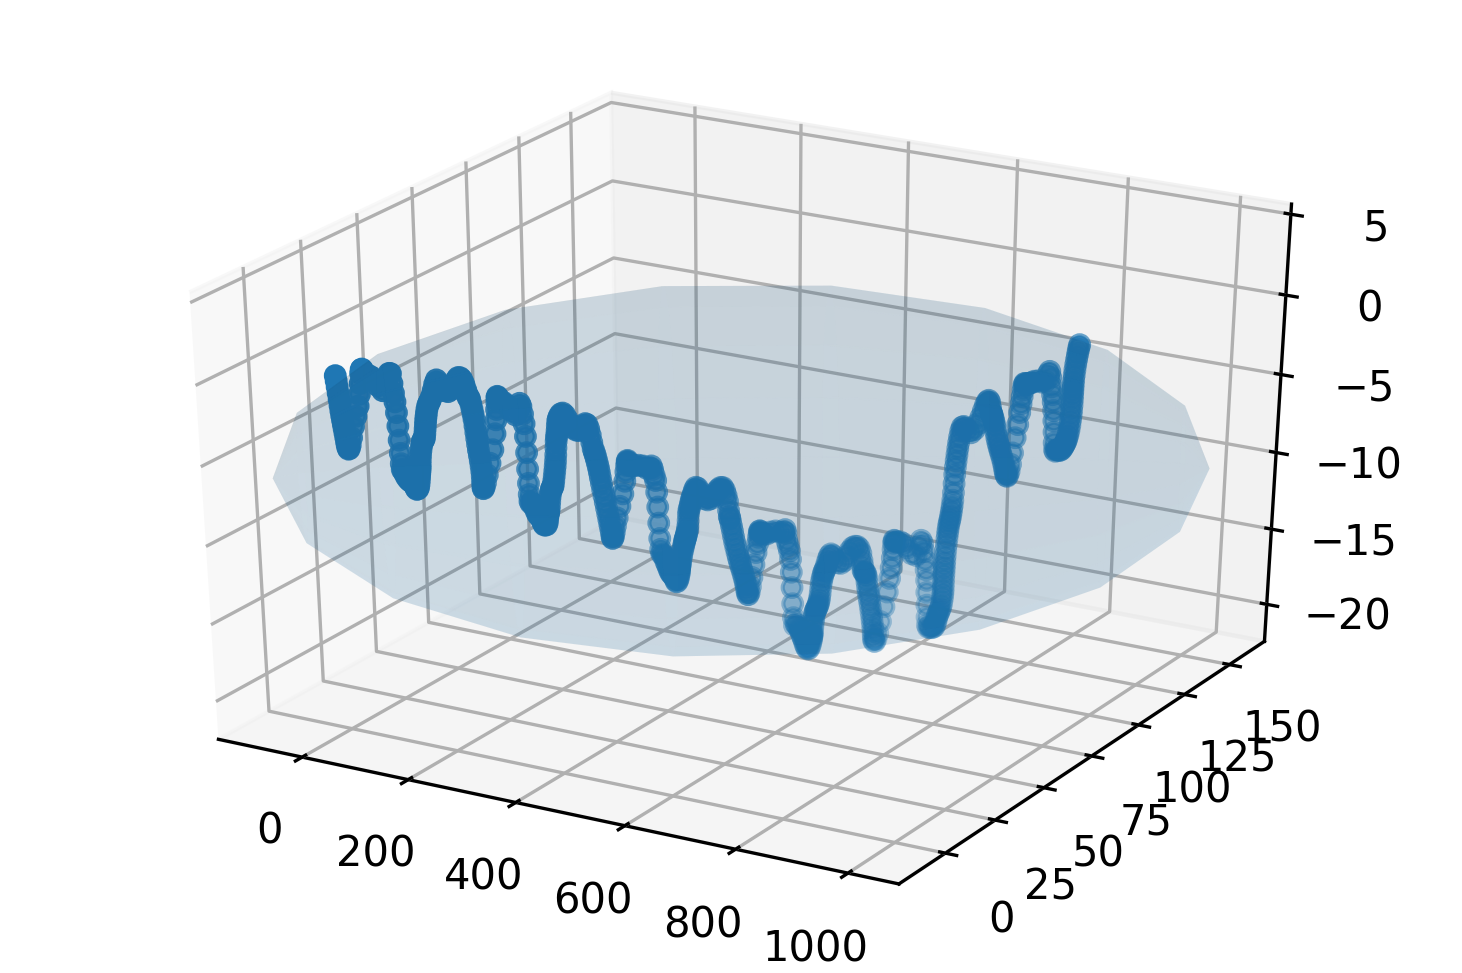

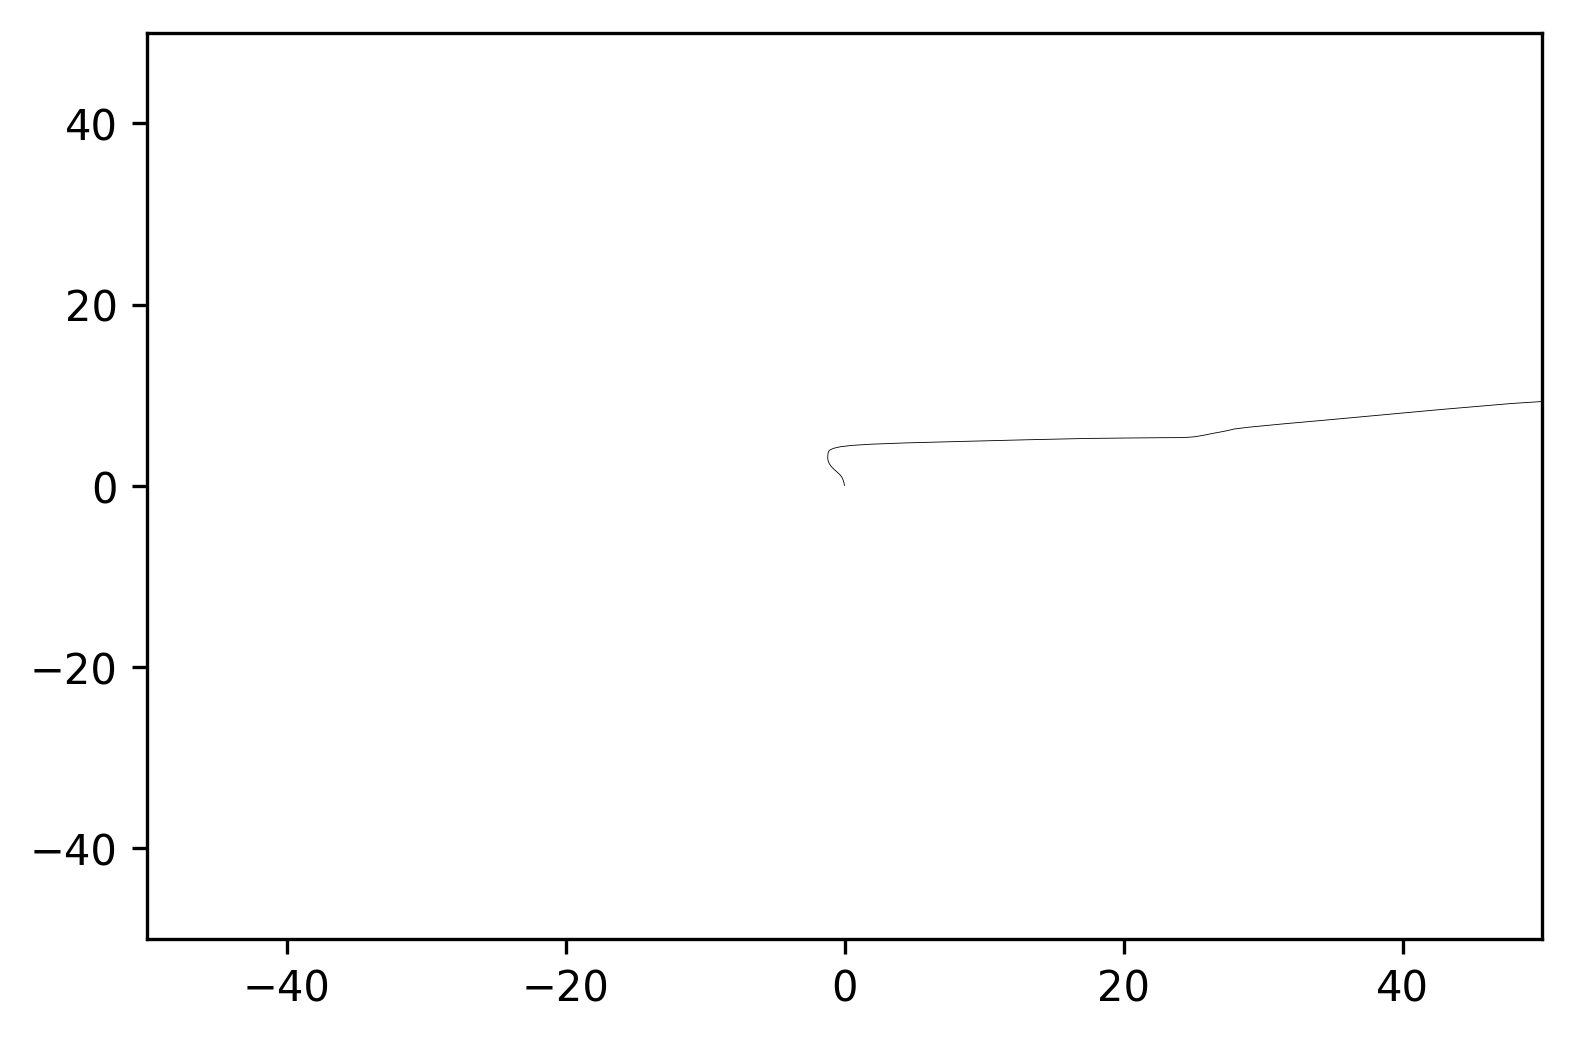

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from path_processors import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def visualizePath(file,  x0, x1, y0, y1):
    X, wavelength, errors  = loadMotionIntoArray(file, highPass=False, min_len=800)
    xyz = accelerationToPos(X)
    r, surface= getBoundingEllipse(xyz)
    x,y,z = surface
    fig = plt.figure(dpi=300, figsize=(5,4))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xyz[:,0],xyz[:,1],xyz[:,2])    
    ax.plot_surface(x, y, z, cstride = 1, rstride = 1, alpha = 0.1)
    plt.show()
    
    from matplotlib.path import Path
    import matplotlib.patches as patches
    import matplotlib.collections as collections
    
    #visualize force plate data from stanford
#     fp = scipy.io.loadmat("./forceplate3.mat")
#     xyz= np.concatenate((fp['FPCOFx'], fp['FPCOFy']), axis=1)
#     print(xyz)
    
    codes = [Path.MOVETO]
    for _ in range(xyz.shape[0] - 1):
        codes.append(Path.LINETO)
    path = Path(xyz[:,0:2], codes)
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111)
    patch = patches.PathPatch(path, facecolor='white', lw=0.2)
    ax.add_patch(patch)
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    plt.show()

# fp = scipy.io.loadmat("./forceplate3.mat")
# print(fp.keys())
# print(fp['dataArray'])
visualizePath("dataSamples/walking/walk_ctrl1.json", -50, 50, -50, 50)
# visualizePath("/home/u5584091/.synapseCache/205/5390205/deviceMotion_walking_rest.json.items-8b0c7c5b-a4f9-4c8d-809a-5feba936a1ab7143462931978174995.tmp", -0.12, 0.15, -0.1, 0.2

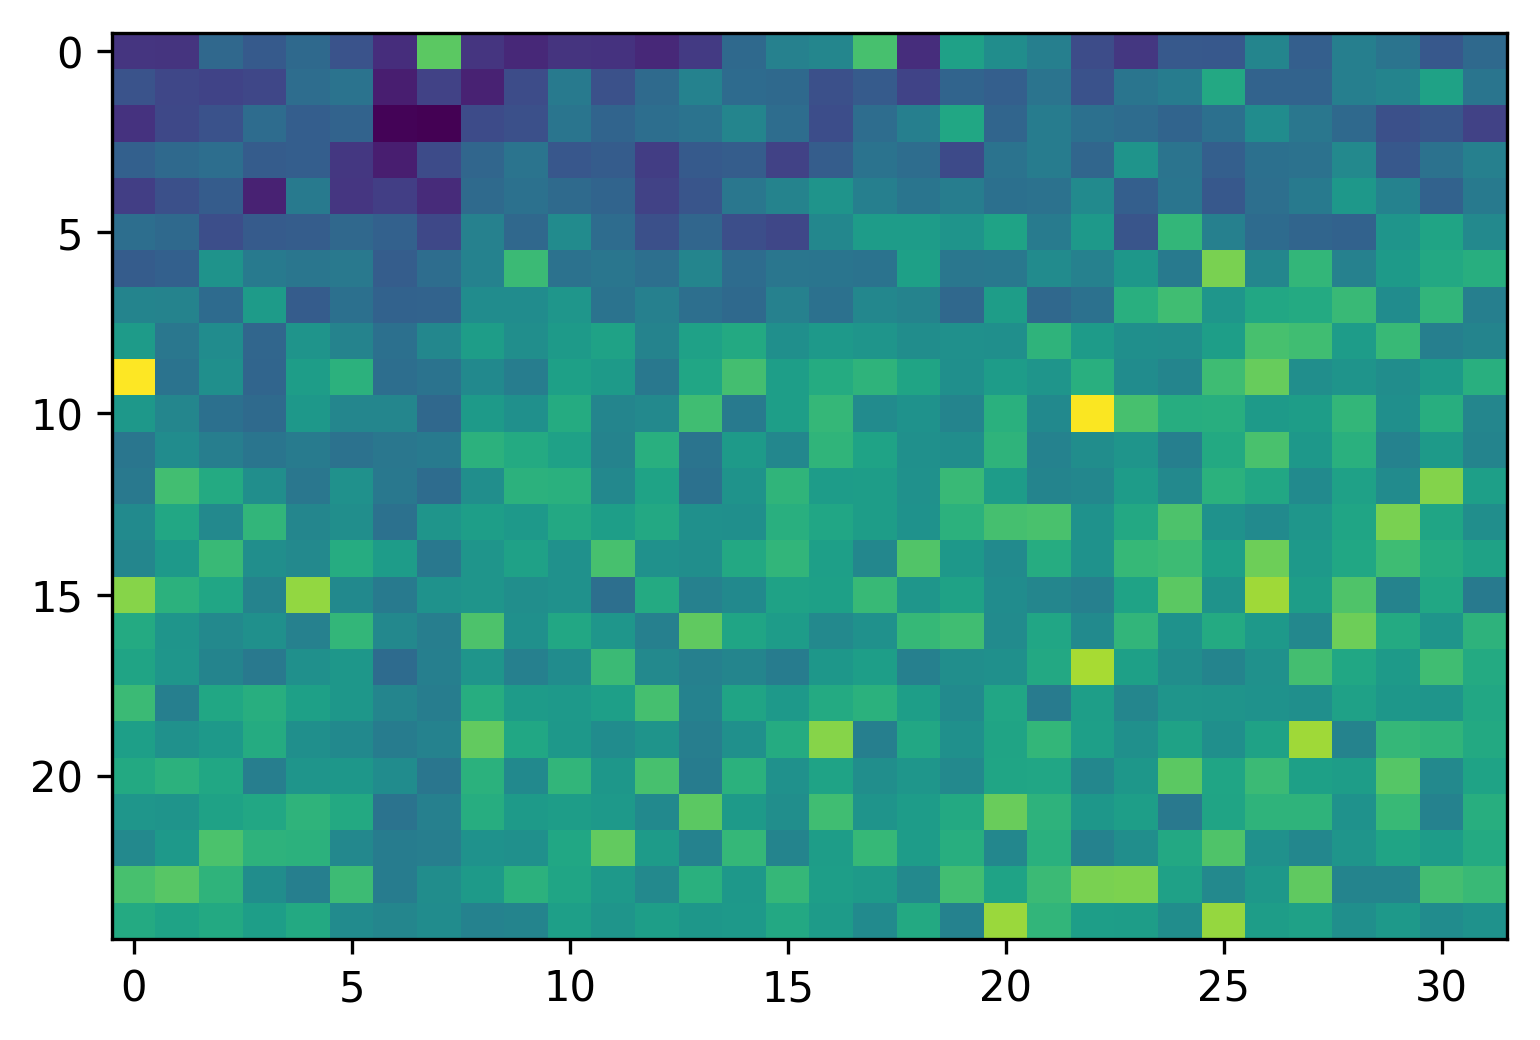

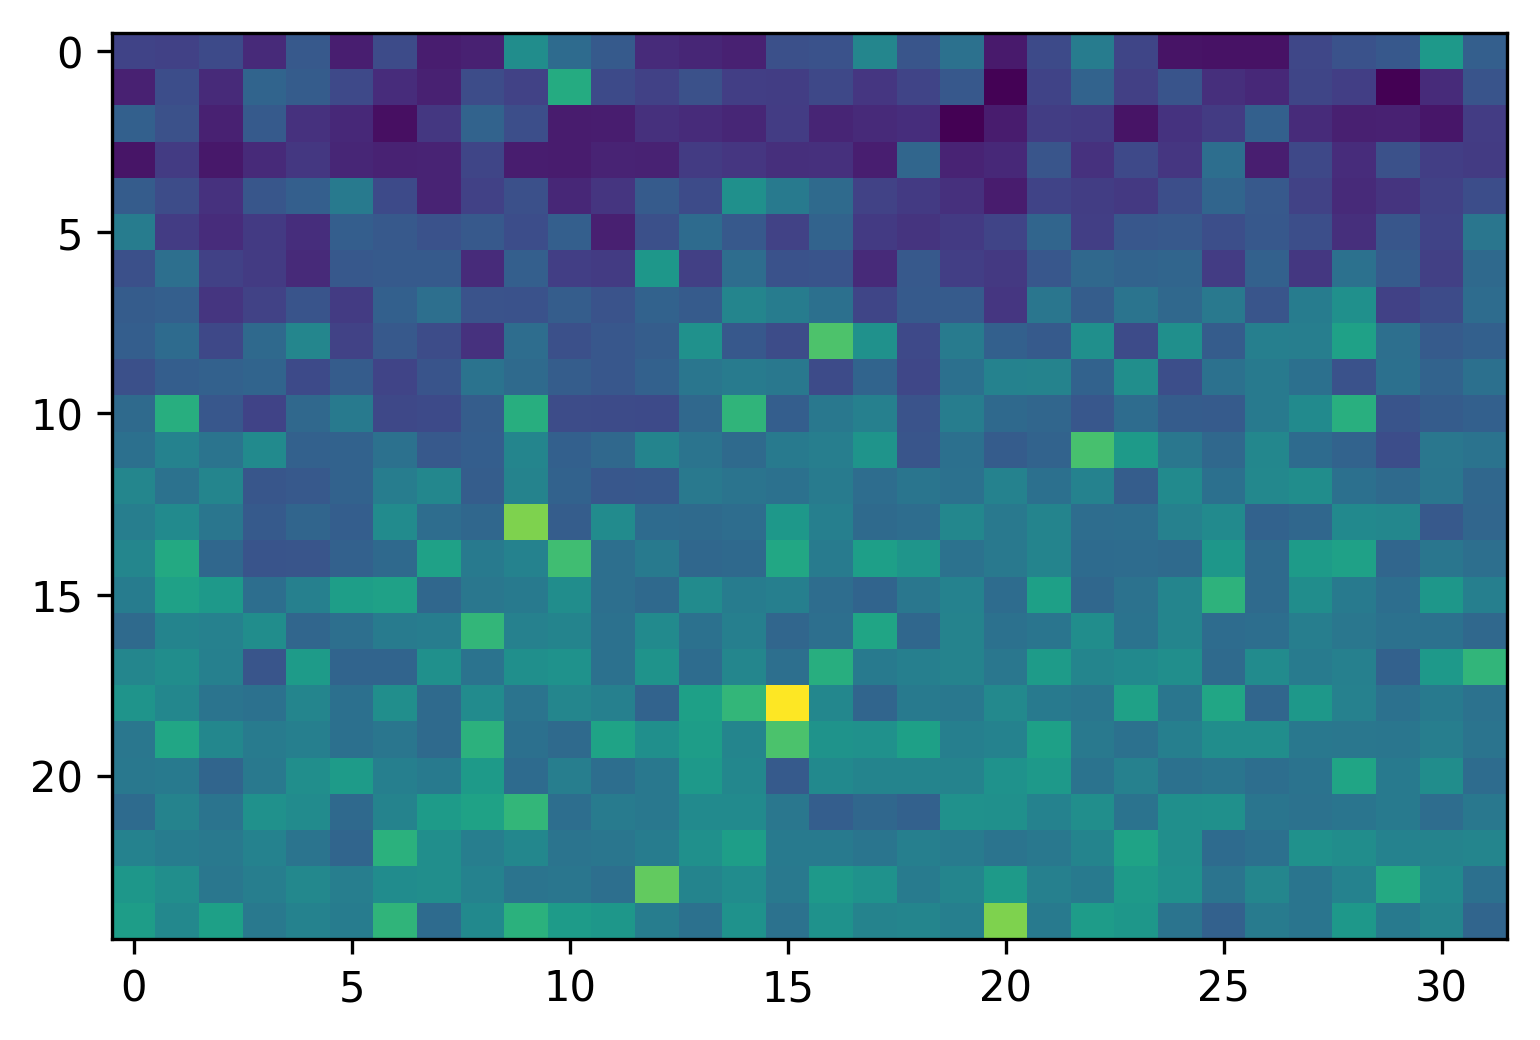

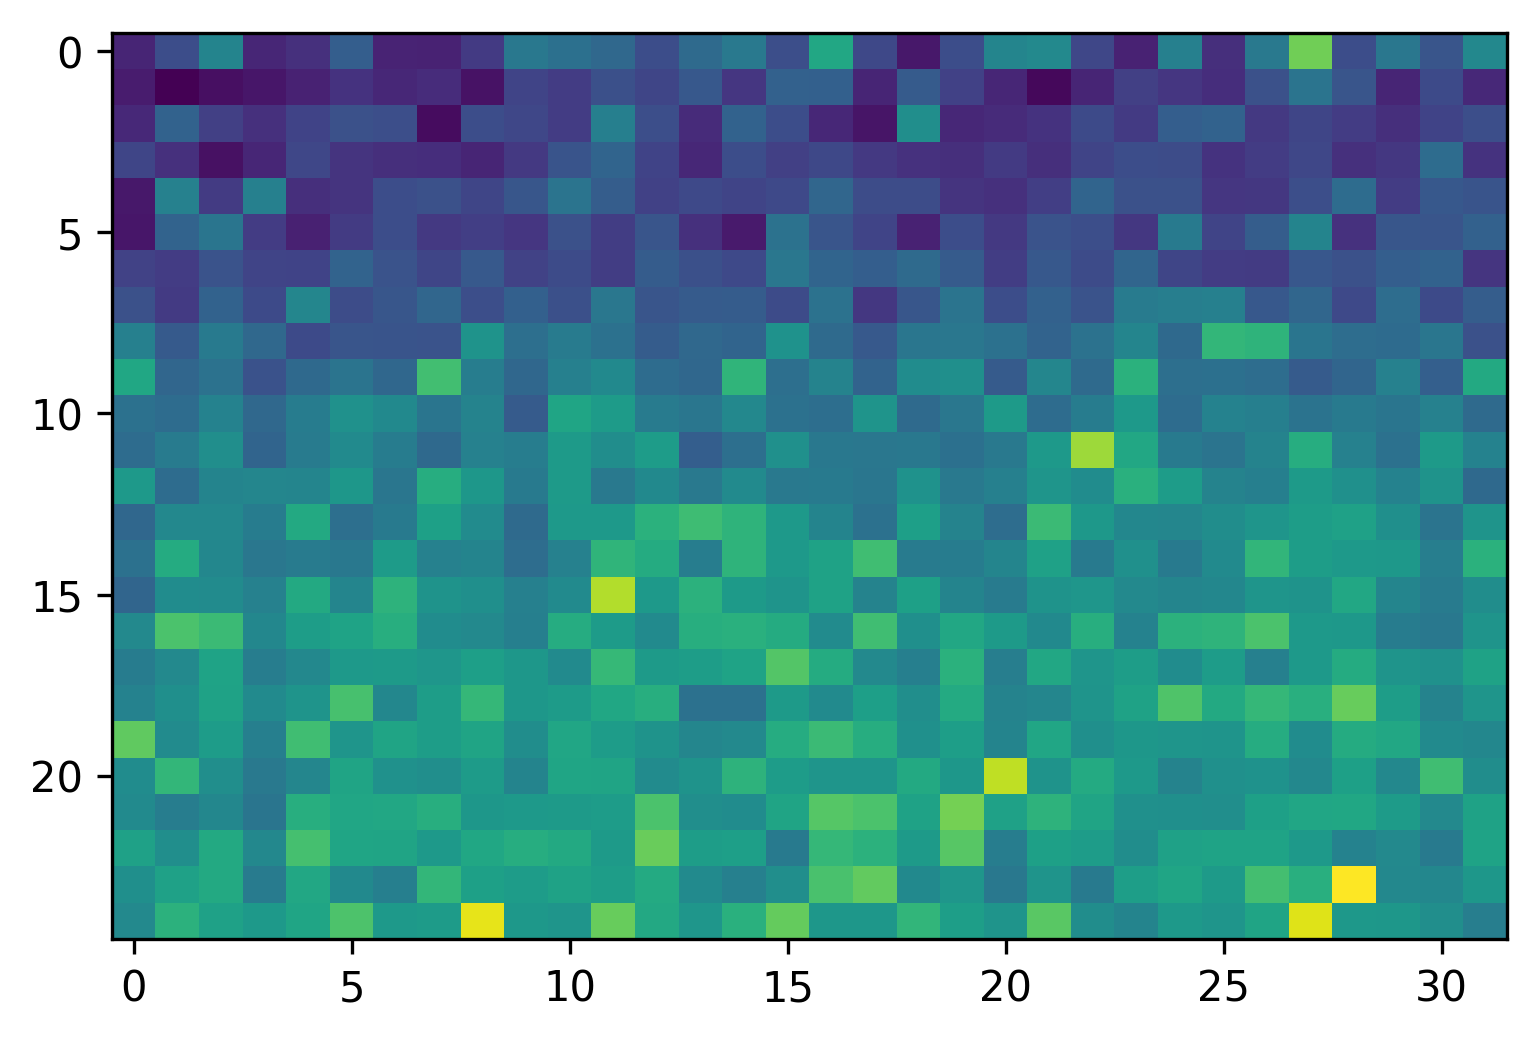

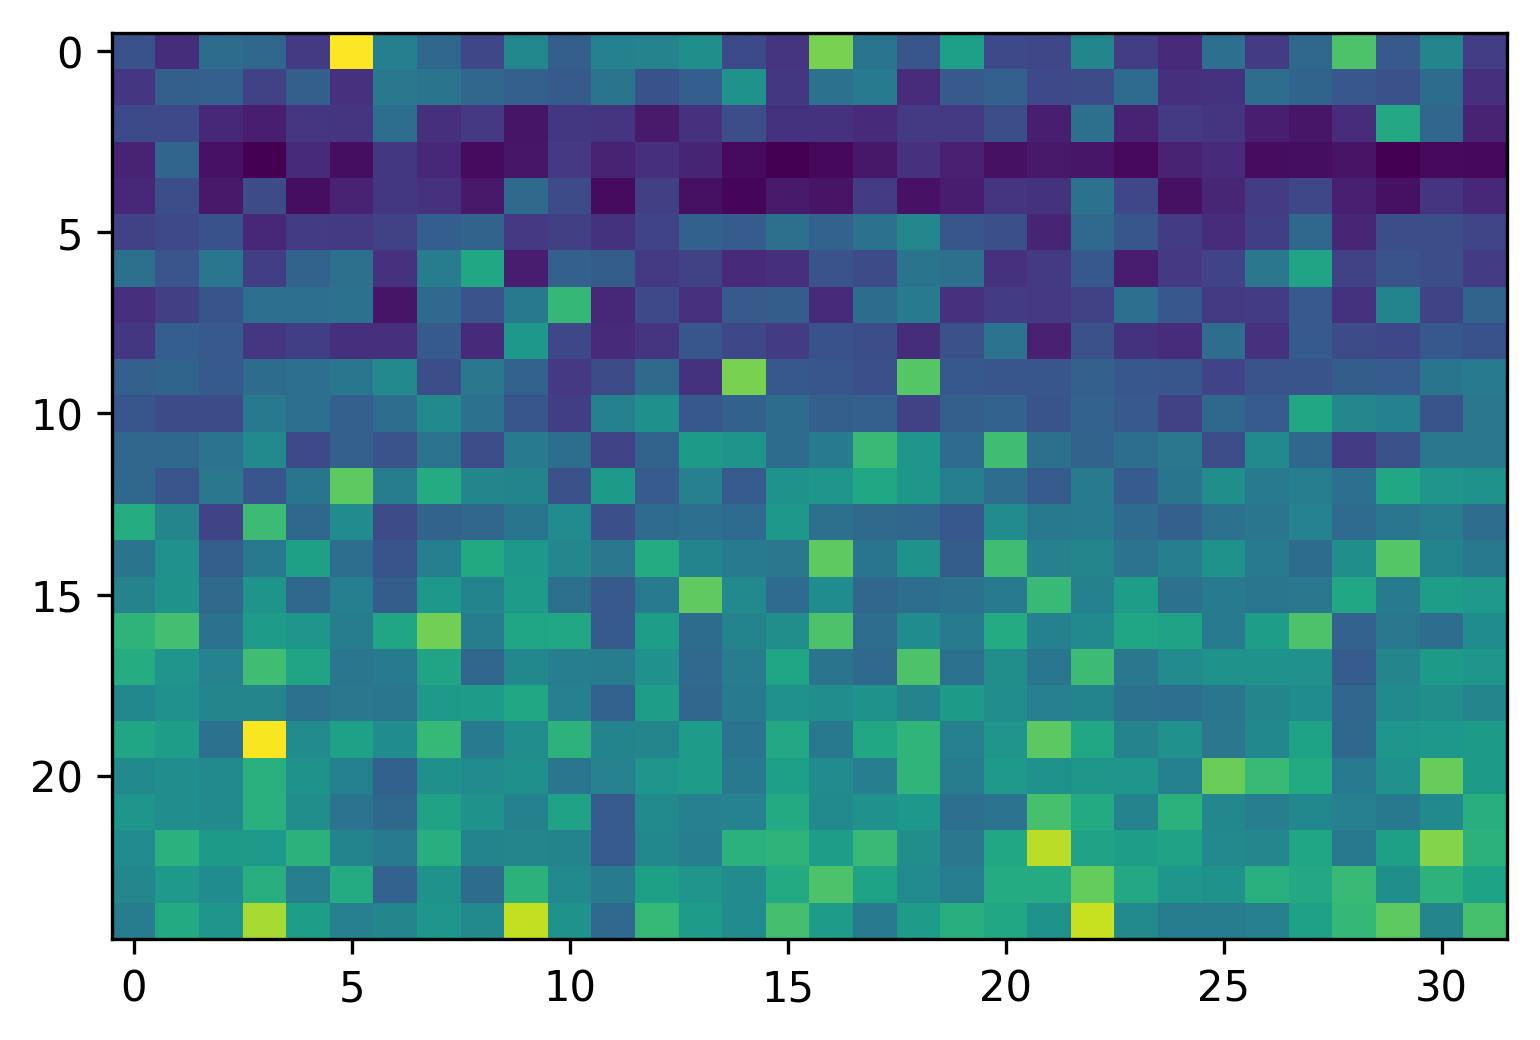

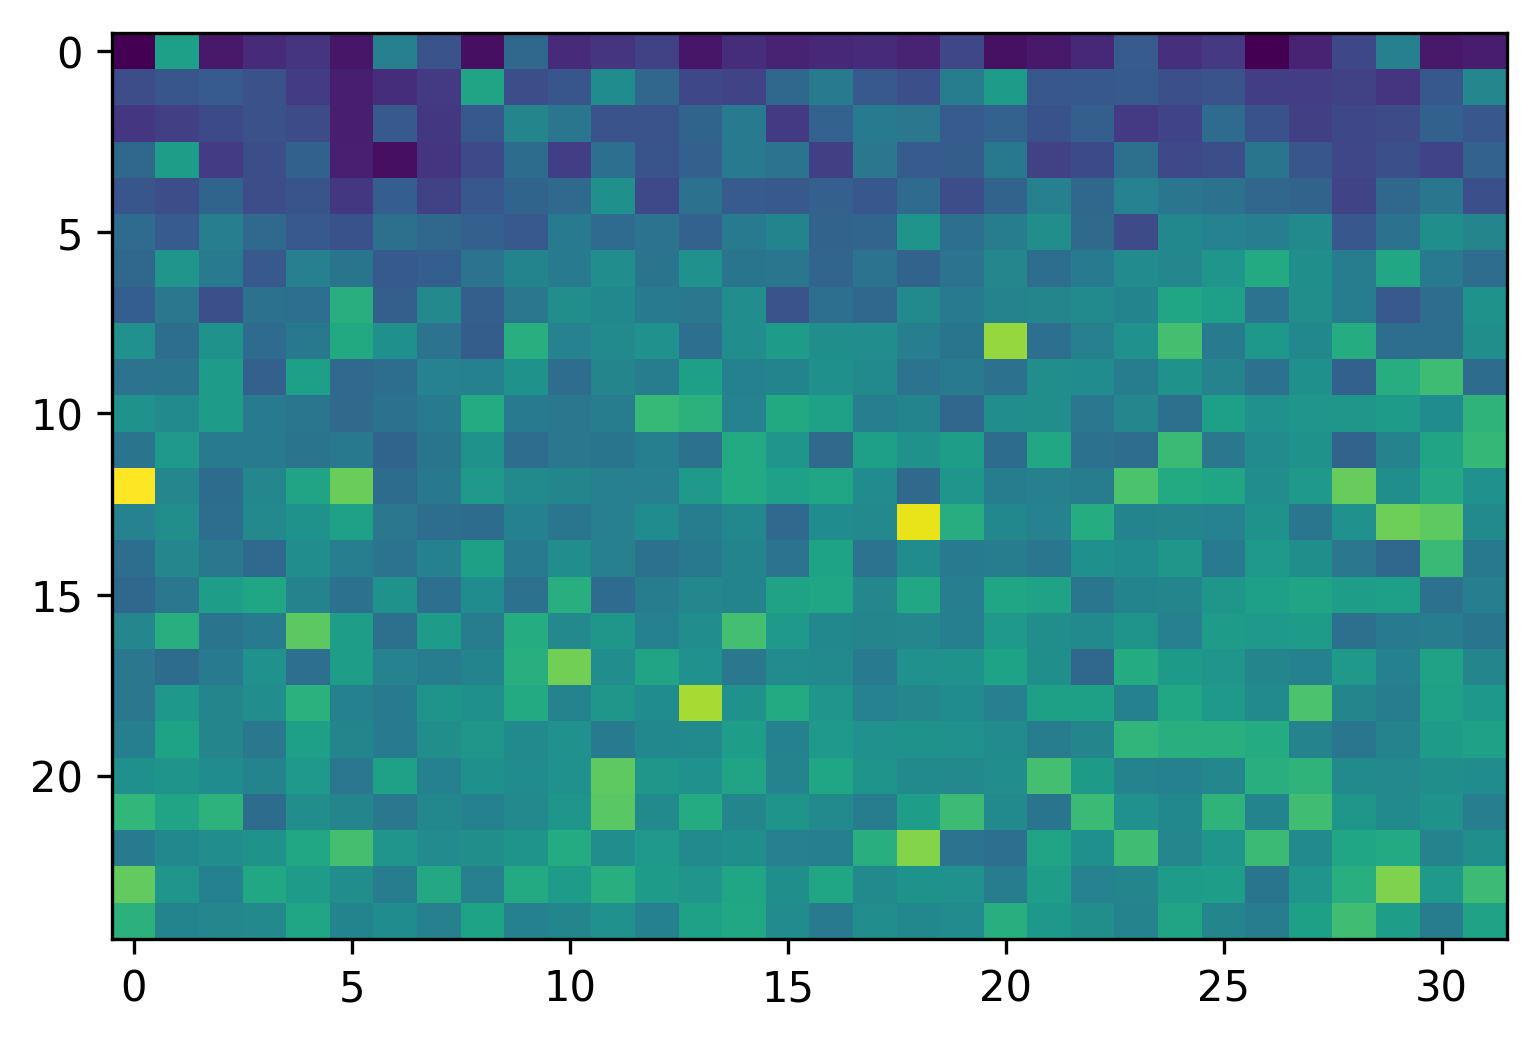

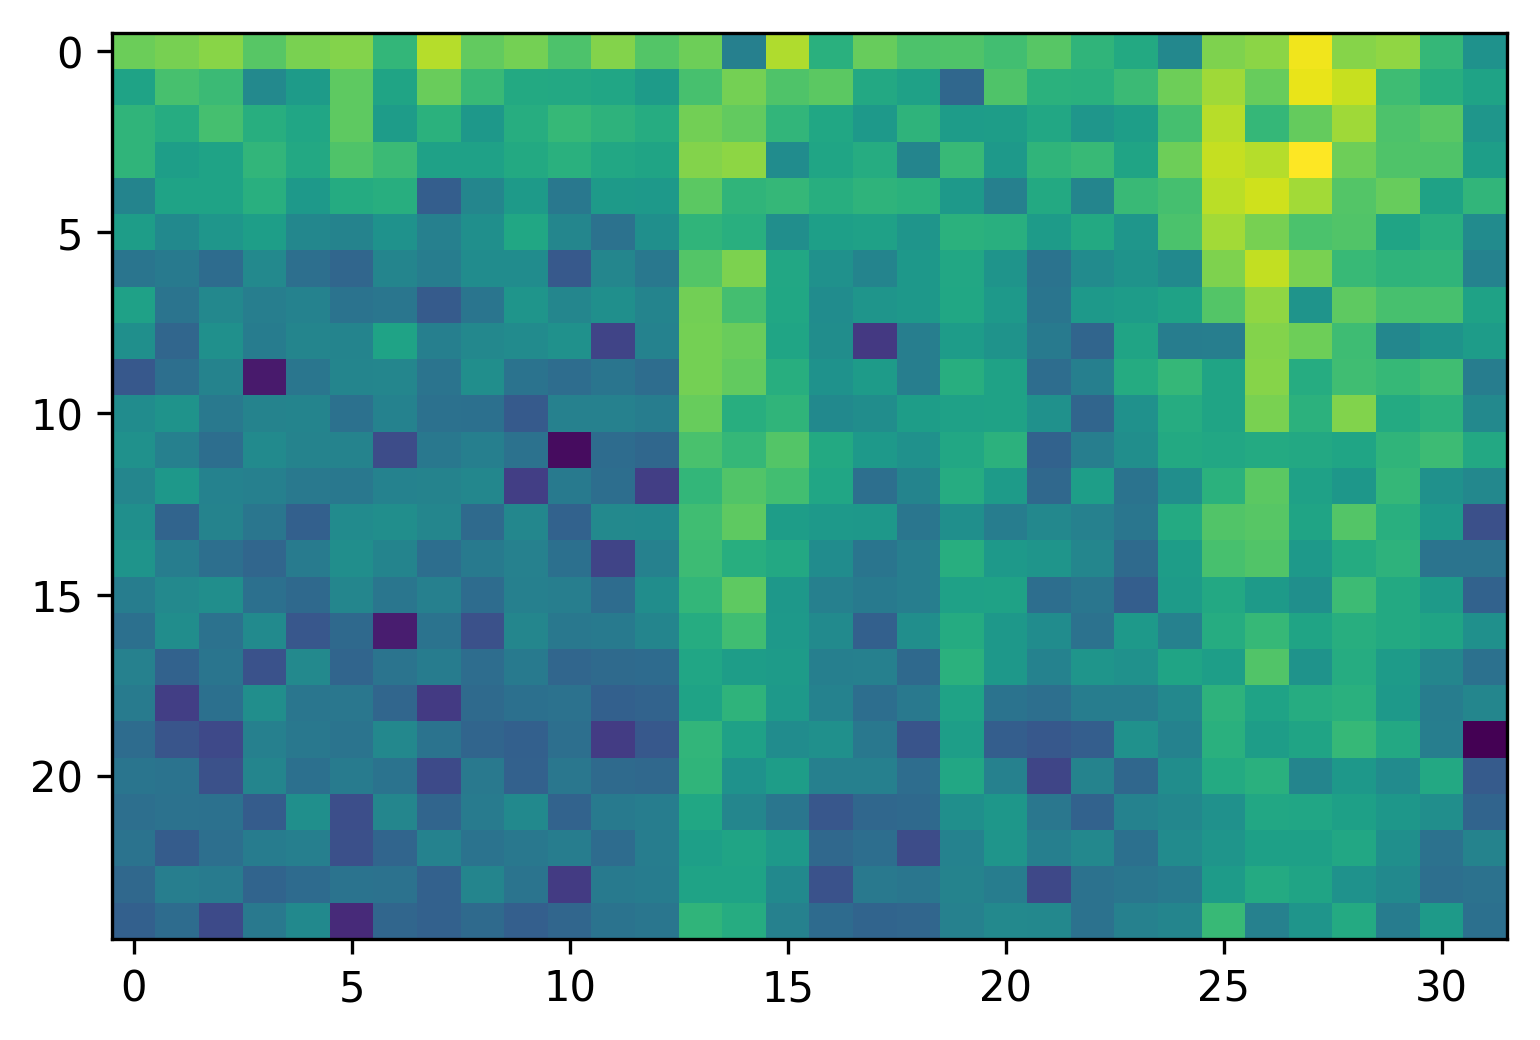

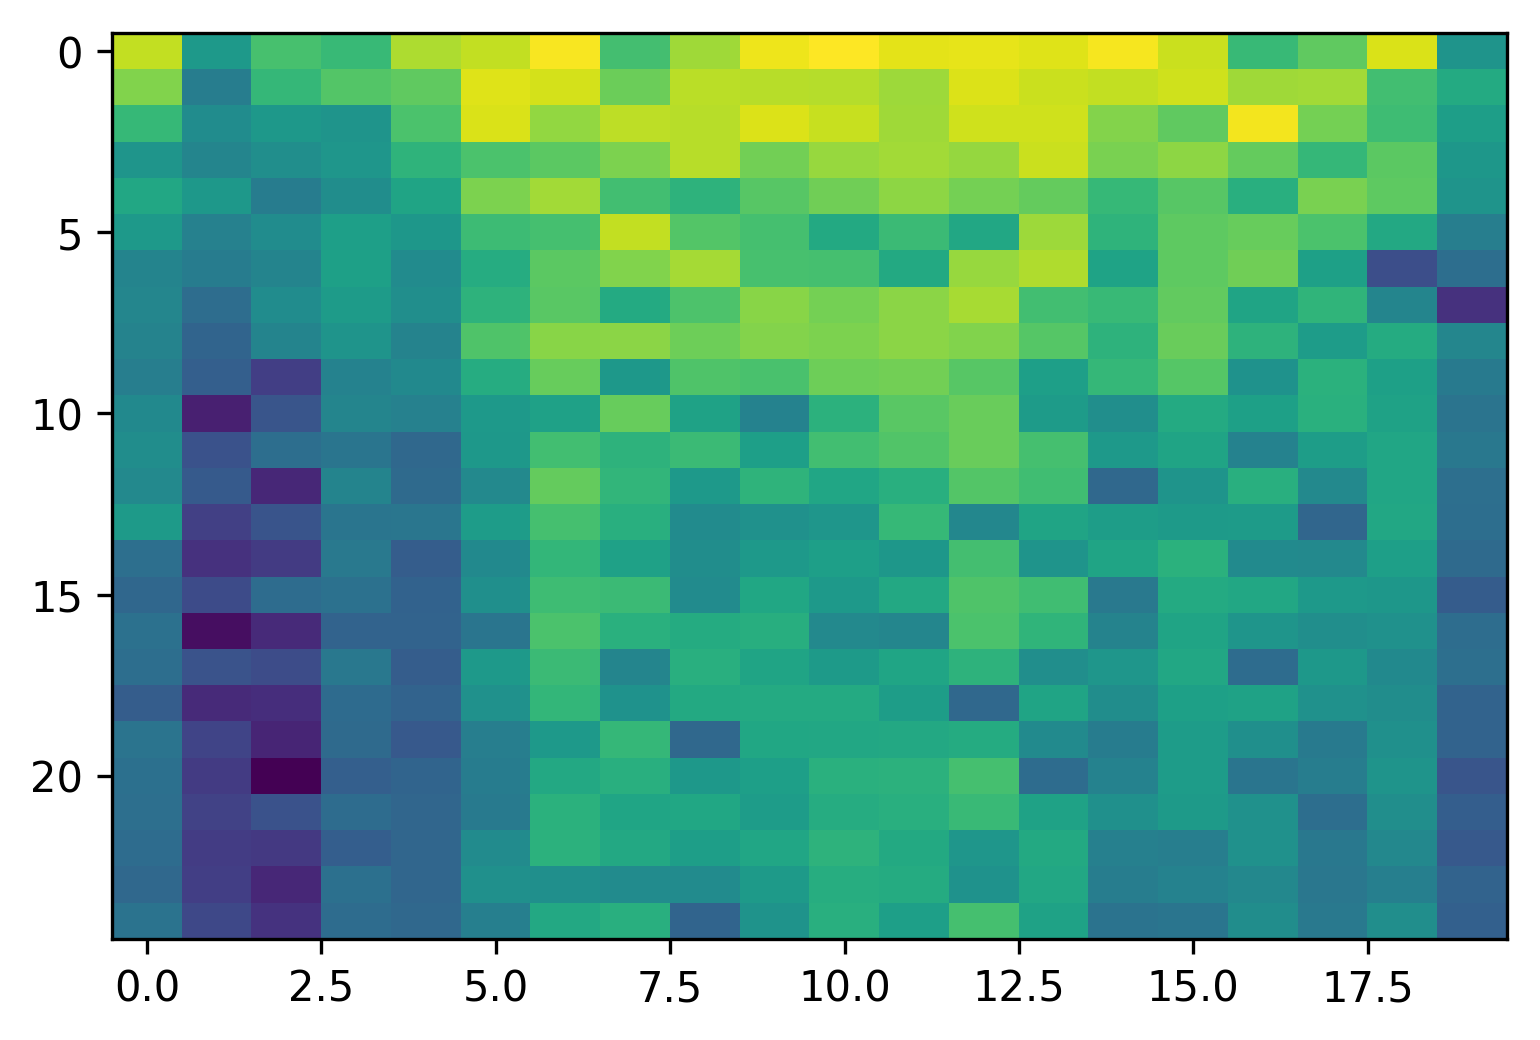

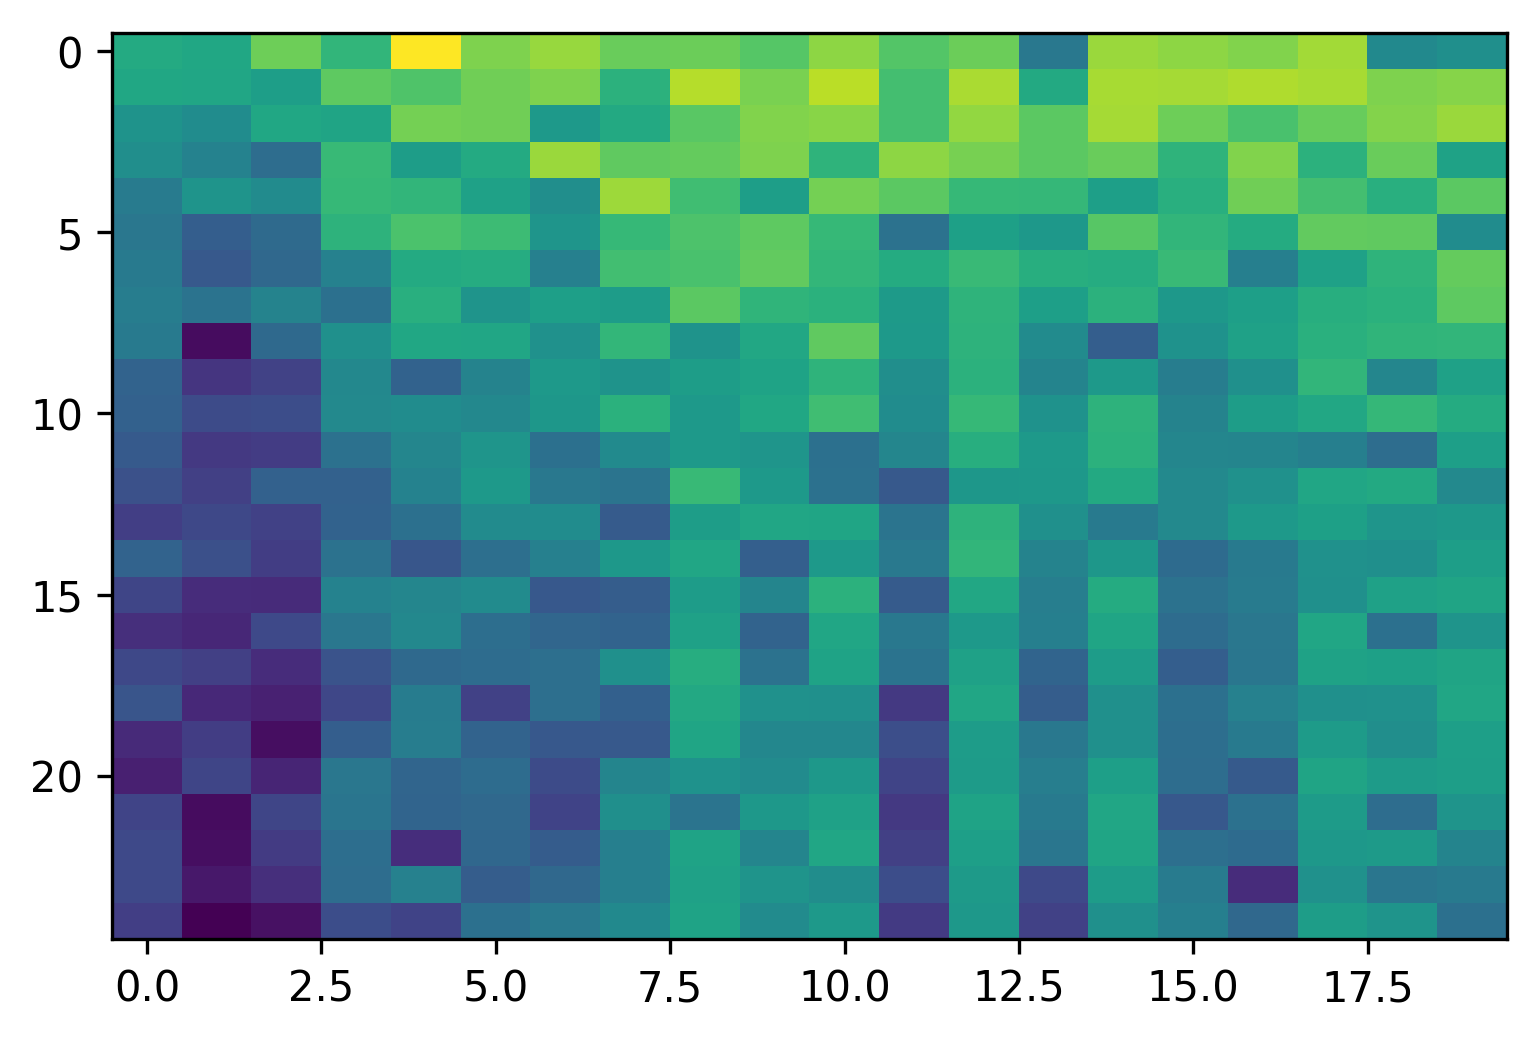

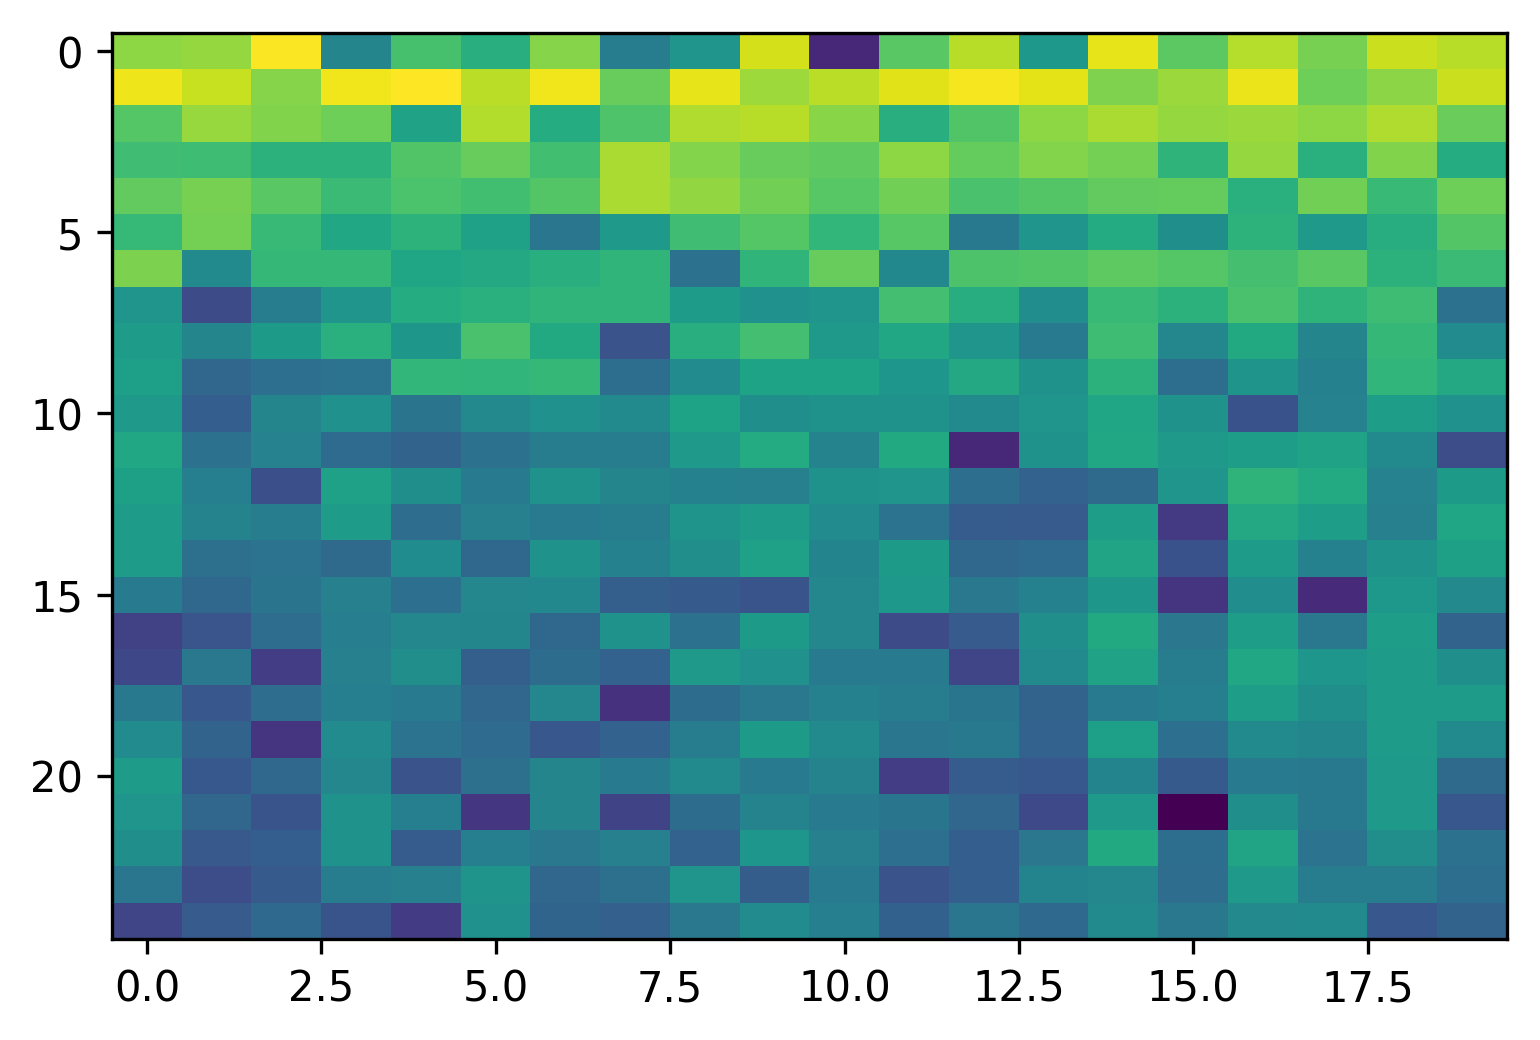

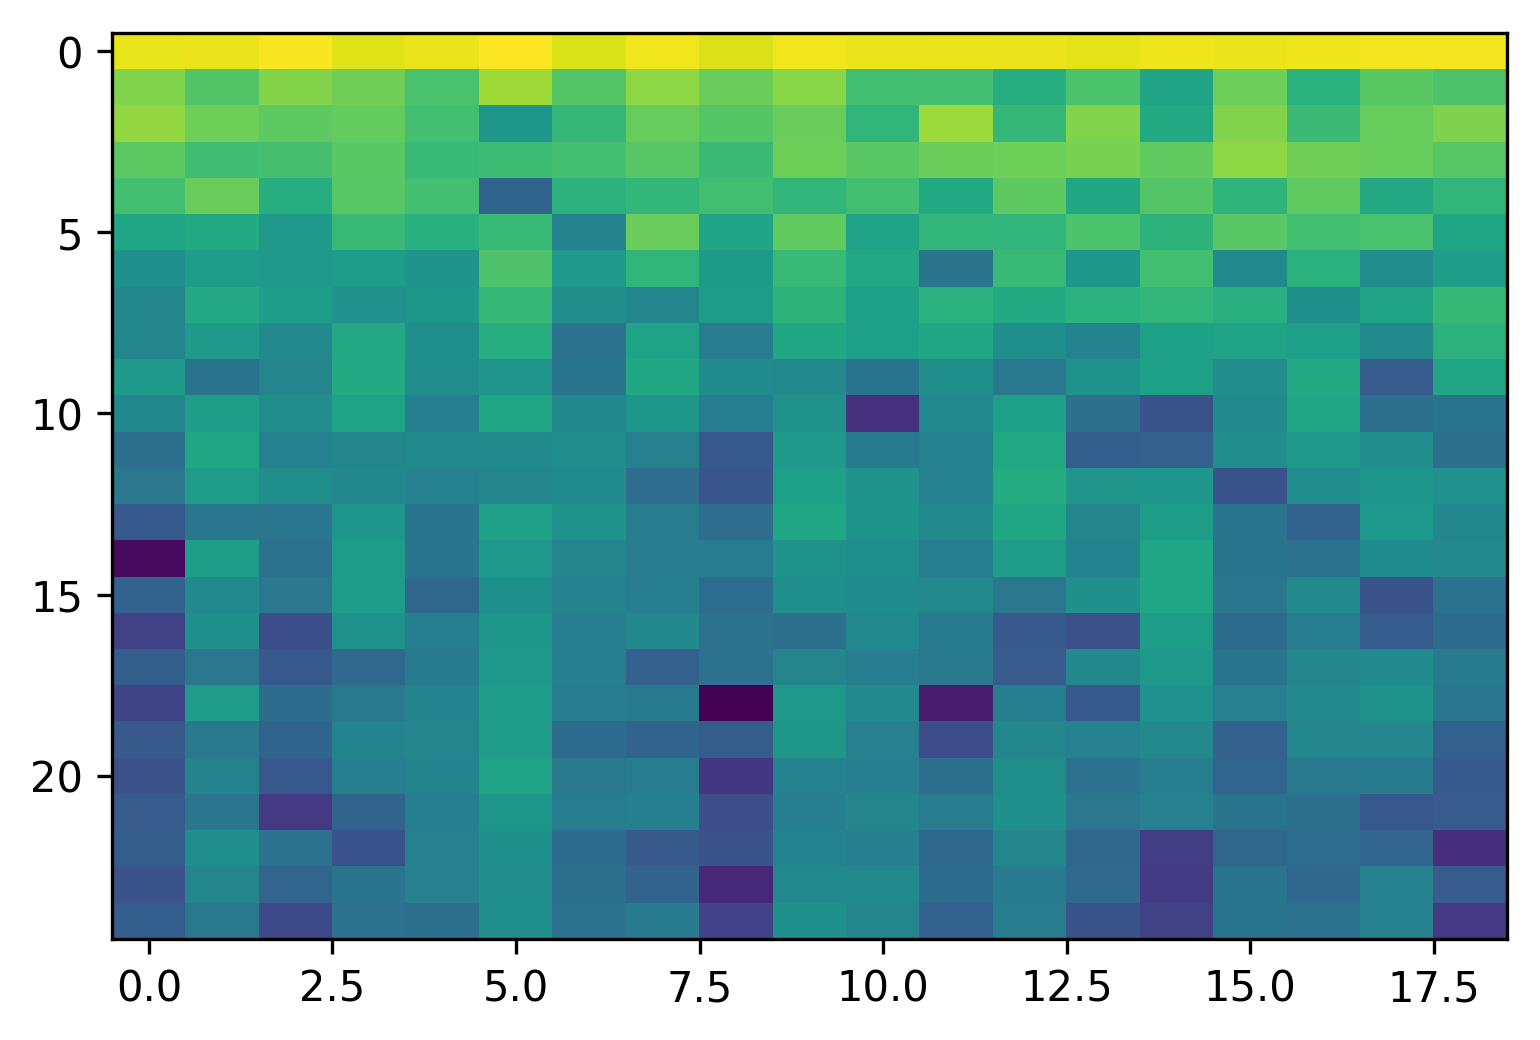

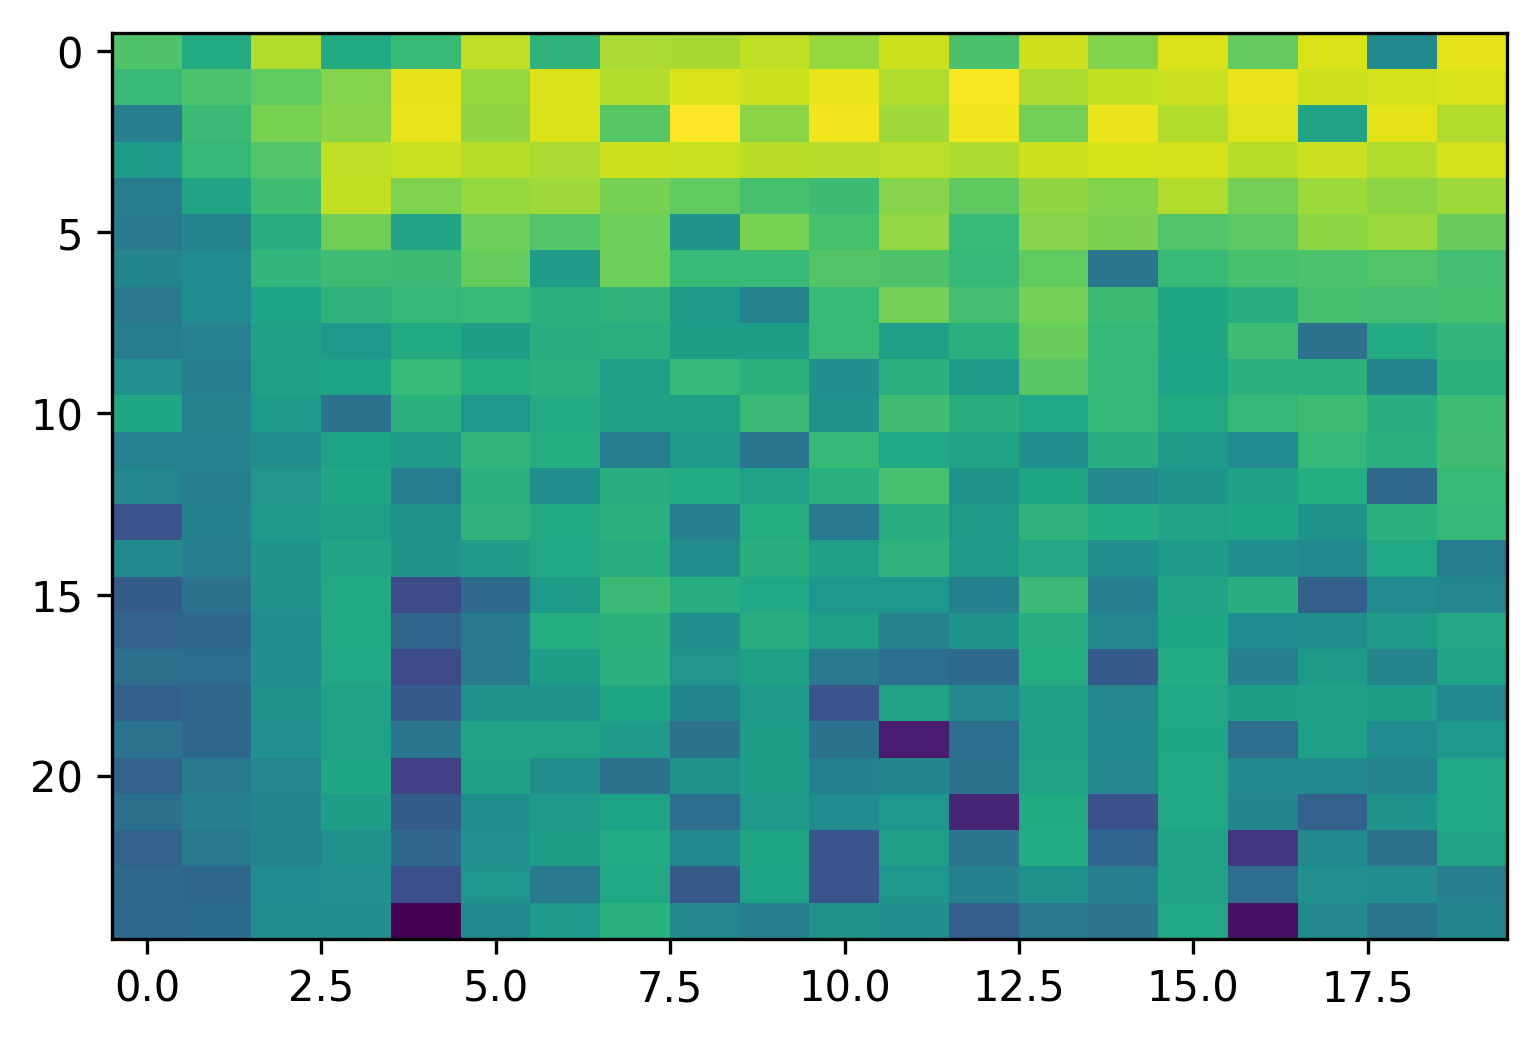

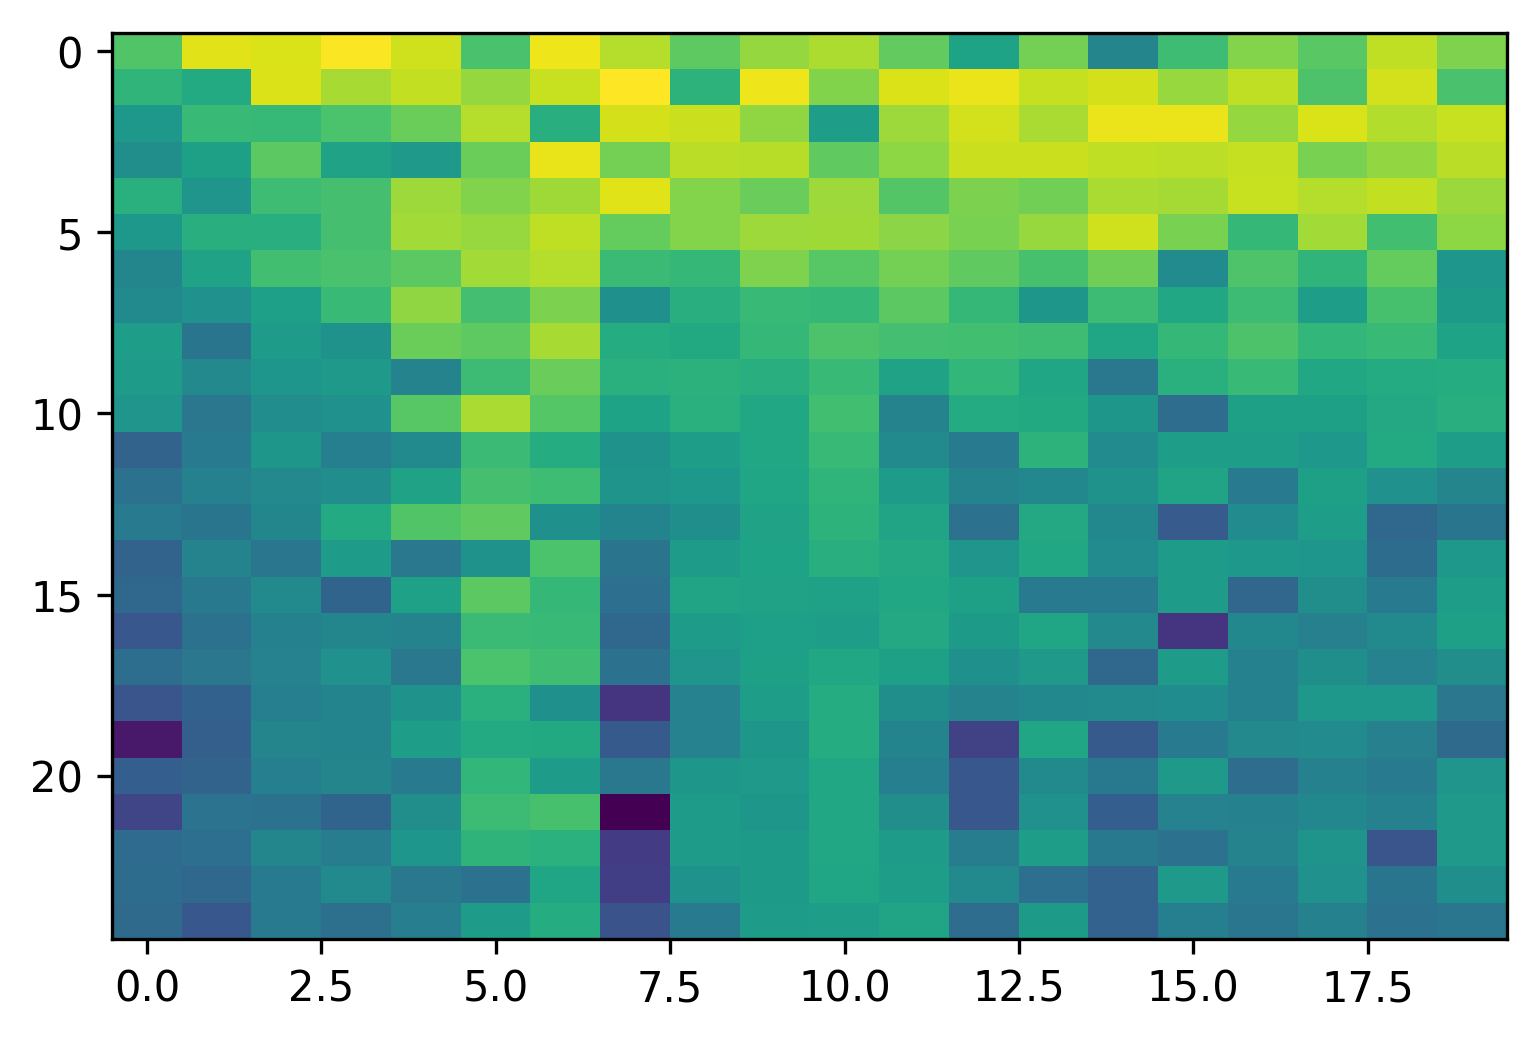

In [14]:
from short_time_fourier import *

def visualizePathFourier(file, crop=(0, 1000)):
    X, wavelength, errors  = loadMotionIntoArray(file, highPass=False, min_len=crop[1], crop=crop)
    fourier = getShortTimeFourier1D(X, 49)
    fourier = np.log(fourier)
    fourier = fourier/np.apply_over_axes(np.max, fourier, [1,2])
    fig = plt.figure(dpi=300)
    plt.imshow(fourier[0], interpolation='nearest', aspect="auto")
    plt.show()

# fp = scipy.io.loadmat("./forceplate3.mat")
# print(fp.keys())
# print(fp['dataArray'])
visualizePathFourier("dataSamples/walking/rest_pd1.json", (400,2000))
visualizePathFourier("dataSamples/walking/rest_pd2.json", (400,2000))
visualizePathFourier("dataSamples/walking/rest_pd3.json", (400,2000))
visualizePathFourier("dataSamples/walking/rest_ctrl4.json", (400,2000))
visualizePathFourier("dataSamples/walking/rest_ctrl2.json", (400,2000))
visualizePathFourier("dataSamples/walking/rest_ctrl6.json", (400,2000))
print()
print()

visualizePathFourier("dataSamples/walking/walk_pd7.json")
visualizePathFourier("dataSamples/walking/walk_pd11.json")
visualizePathFourier("dataSamples/walking/walk_pd3.json")
visualizePathFourier("dataSamples/walking/walk_ctrl1.json")
visualizePathFourier("dataSamples/walking/walk_ctrl2.json")
visualizePathFourier("dataSamples/walking/walk_ctrl3.json")